In [ ]:
###Data Modeling###
#Import what I need for modeling
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier
from  sklearn.model_selection import KFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from imblearn.metrics import classification_report_imbalanced

In [4]:
import pandas as pd
data = pd.read_csv('./Data_Files/final_data (3).csv')

In [5]:
#My list of all columns with dummy variables
data.columns

Index(['Unnamed: 0', 'age_Lower_Middle_Aged', 'age_Middle_Aged',
       'age_Upper_Middle_Aged', 'age_Young', 'hrswrk_HoursWrk_30-40',
       'hrswrk_HoursWrk_40-60', 'hrswrk_HoursWrk_60+', 'health_Fair',
       'health_Good_Health', 'health_Poor_Health', 'health_Very_Good_Health',
       'income_Low-Income', 'income_Lower-Middle-Income',
       'income_Middle-Income', 'income_Very-High-Income', 'SSI_Yes_SSI',
       'Health_Coverage_No_healthcoverage', 'Education_High_School_Graduate',
       'Education_High_School_Or_Less', 'Education_Masters_Degree',
       'Education_NIU_educ', 'Education_Some_College',
       'JobOccupation_Construction and Extractive Trades Occupation',
       'JobOccupation_Executive, Administrative, and Managerial Occupations',
       'JobOccupation_Machine Operators, Assemblers, and Inspectors',
       'JobOccupation_Mechanics and Repairers Occupation',
       'JobOccupation_Military', 'JobOccupation_Not_In_LaborForce',
       'JobOccupation_Other Agricultural

In [6]:
#I want to standardize the data so make the mean 0 and the standard deviation 1

ss = StandardScaler()
scaled = ss.fit_transform(data)

corr_data = pd.DataFrame(scaled, columns=data.columns)

In [7]:
#I decided to not use PCA or visualizations and use Tableau instead
import matplotlib.pyplot as plt
import seaborn as sns

#plt.figure(figsize=(20,15))
#heatmap = sns.heatmap(corr_data.corr(), vmin=0, annot=True, fmt='.2f', cmap='YlGnBu')

#plt.title('Correlations on Scaled Data')

In [8]:
#This of course is inaccurate but I wanted to see if my variables generally made sense.
#Based on my research, it makes sense. High cholestral, smoking, and worse health increases cancer rates
#Managerial jobs cause cancer because of lack of exercise and increased health problems
data.corr()['cancer_count'].sort_values(ascending=False).head(15)

cancer_count                                                           1.000000
highchol_highchol                                                      0.252670
Depressed_Not_Depressed                                                0.132871
JobOccupation_Professional Specialty Occupations                       0.118273
JobOccupation_Executive, Administrative, and Managerial Occupations    0.104156
worrymedbills_somewhat_worried_medbills                                0.091164
insulin_Yes_Insulin                                                    0.075748
health_Fair                                                            0.070030
JobOccupation_Sales Occupations                                        0.063619
Smoking_Smoking                                                        0.063298
JobOccupation_Machine Operators, Assemblers, and Inspectors            0.062381
race_White                                                             0.053129
health_Poor_Health                      

In [9]:
#PCA - This is how I would have used PCA
#import seaborn as sns
#g = sns.PairGrid(data)
#g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
#g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
#g = g.map_diag(plt.hist)        # Histograms along diagonal.

#plt.show()

In [10]:
#I reran models multiple times, dropped unimportant variables using Tableau as feature selection
#Selected variables that had the best accuracy and highest metrics. Kept about 20 columns

In [11]:
#feature selection - train/test data 
X = data.drop(columns=['cancer_count'])
y = data['cancer_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [12]:
#Baseline using dummy regressor - sensitivity/recall
dummy_regr = DummyClassifier()
dummy_regr.fit(X_train, y_train)

dummy_regr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
#Baseline will be 0.5 using balanced accuracy score - 
#I avoided using regular accuracy score since my data is so imbalanced 
y_pred = dummy_regr.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [15]:
#SMOTE - only use dummy variables processing categorical data (X-values)
#Only use smote on training test not testing data to prevent data leakage
#Testing data represents real life so I won't use smote
#Make training data 50/50 to balance it out

from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=100)
X_train, y_train = ada.fit_resample(X_train, y_train)

In [16]:
y_test.shape

(52191,)

In [17]:
#train data now 50/50
y_train.value_counts(normalize=True)

0    0.503053
1    0.496947
Name: cancer_count, dtype: float64

In [18]:
#testing data still the same, very imbalanced
y_test.value_counts(normalize=True)

0    0.960683
1    0.039317
Name: cancer_count, dtype: float64

In [21]:
#Used pipeline to fit standardscaler and various model types
#I tried using polynomial features but it keeps crashing from overload
pipe_ada = Pipeline([
    ('ss', StandardScaler()),
    ('abc', AdaBoostClassifier(learning_rate=0.5, n_estimators=50, random_state=1))
])

pipe_grad = Pipeline([
    ('ss', StandardScaler()),
    ('gbc', GradientBoostingClassifier(random_state=1))
])

pipe_km = Pipeline([
    ('ss', StandardScaler()),
    ('km', KMeans(random_state=1))
])

pipe_dbs = Pipeline([
    ('ss', StandardScaler()),
    ('dbs', DBSCAN())
])

pipe_xgb = Pipeline([
    ('ss', StandardScaler()),
    ('xgb', xgb.XGBClassifier(n_estimators = 200))
])

pipe_log = Pipeline([
    ("vectorizer", CountVectorizer())
    ('ss', StandardScaler()),
    ('log', LogisticRegression())
])

#n_estimators=70, random_state=42, max_features=none, min_samples_leaf=10
pipe_forest = Pipeline([
    ('ss', StandardScaler()),
    ('forest', RandomForestClassifier(n_estimators=70, random_state=42, min_samples_leaf=10))
])

pipe_svc = Pipeline([
    ('ss', StandardScaler()),
    ('svc', RandomForestClassifier())
])

pipe_dectree = Pipeline([
    ('ss', StandardScaler()),
    ('dec', DecisionTreeClassifier())
])

pipe_svm = Pipeline([
    ('ss', StandardScaler()),
    ('dec', SVC())
])

In [22]:
#Logarithmic regression has the highest accuracy

pipe_log.fit(X_train, y_train)

pipe_log.score(X_train, y_train), pipe_log.score(X_test, y_test)

(0.8820950329752653, 0.8376540016477937)

In [23]:
#Used balanced accuracy score to compensate for imbalanced y-value
y_pred = pipe_log.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.8692337932127633

In [24]:
pipe_ada.fit(X_train, y_train)

pipe_ada.score(X_train, y_train), pipe_ada.score(X_test, y_test)

(0.960760772142924, 0.9277844839148512)

In [25]:
y_pred = pipe_ada.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.7238145061990824

In [26]:
pipe_grad.fit(X_train, y_train)

pipe_grad.score(X_train, y_train), pipe_grad.score(X_test, y_test)

(0.9769908899977259, 0.9569657603801421)

In [27]:
y_pred = pipe_grad.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.545271251184864

In [28]:
pipe_xgb.fit(X_train, y_train)

pipe_xgb.score(X_train, y_train), pipe_xgb.score(X_test, y_test)

(0.9793285888191778, 0.9607211971412696)

In [29]:
y_pred = pipe_xgb.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5016557916360938

In [30]:
pipe_km.fit(X_train, y_train)

pipe_km.score(X_train, y_train), pipe_km.score(X_test, y_test)

(-13735850.526194202, -2588847.8213211126)

In [31]:
pipe_dectree.fit(X_train, y_train)

pipe_dectree.score(X_train, y_train), pipe_dectree.score(X_test, y_test)

(1.0, 0.9325937422160909)

In [32]:
y_pred = pipe_dectree.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.593112856784455

In [33]:
pipe_svc.fit(X_train, y_train)

pipe_svc.score(X_train, y_train), pipe_svc.score(X_test, y_test)

(1.0, 0.956199344714606)

In [34]:
y_pred = pipe_svc.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5250085026783436

In [35]:
pipe_forest.fit(X_train, y_train)

pipe_forest.score(X_train, y_train), pipe_forest.score(X_test, y_test)

(0.9795827592203658, 0.9603571497001399)

In [36]:
y_pred = pipe_forest.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.5035695503342812

In [37]:
##I choose to use other metrics such as F1 score, preceision, and recall
#For cancer, true positives and true negatives are good because accuracy is important

#False positives - false alarms, people test positive for cancer when they don't have cancer
#Generally bad because it could result on costly medical procedures or an extra scan which are unnecessary

#False negative - very deadly, person test negative for cancer when they don't have cancer
#Avoid at all costs - could result in lives lost

#accuracy - a great measur, important to see how correct your model is
#precision - if you want to be more confident of your true positives
#recall - useful if false positives are far better than false negatives (I chose this, would rather get false alarms than lives lost)
#specificity - useful if you don't want any false alarms

#decision tree is second favorite model. High recall scores and high accuracy
y_test = data['cancer_count']  
predict_grad = pipe_dectree.predict(data.drop(columns = ['cancer_count']))
print(classification_report_imbalanced(y_test, predict_grad, target_names=['No', 'Yes']))

                   pre       rec       spe        f1       geo       iba       sup

         No       0.99      0.99      0.81      0.99      0.89      0.81    200558
        Yes       0.77      0.81      0.99      0.79      0.89      0.78      8206

avg / total       0.98      0.98      0.81      0.98      0.89      0.81    208764



In [38]:
#Logarithmic regression is my preferred model. I want false positives to be as low as possible
y_test = data['cancer_count']  
predict_grad = pipe_log.predict(data.drop(columns = ['cancer_count']))
print(classification_report_imbalanced(y_test, predict_grad, target_names=['No', 'Yes']))

                   pre       rec       spe        f1       geo       iba       sup

         No       1.00      0.83      0.90      0.91      0.87      0.75    200558
        Yes       0.18      0.90      0.83      0.30      0.87      0.76      8206

avg / total       0.96      0.84      0.90      0.88      0.87      0.75    208764



In [39]:

y_test = data['cancer_count']  
predict_grad = pipe_ada.predict(data.drop(columns = ['cancer_count']))
print(classification_report_imbalanced(y_test, predict_grad, target_names=['No', 'Yes']))

                   pre       rec       spe        f1       geo       iba       sup

         No       0.98      0.94      0.50      0.96      0.68      0.49    200558
        Yes       0.27      0.50      0.94      0.35      0.68      0.45      8206

avg / total       0.95      0.93      0.51      0.94      0.68      0.49    208764



In [40]:

y_test = data['cancer_count']  
predict_grad = pipe_grad.predict(data.drop(columns = ['cancer_count']))
print(classification_report_imbalanced(y_test, predict_grad, target_names=['No', 'Yes']))

                   pre       rec       spe        f1       geo       iba       sup

         No       0.96      0.99      0.09      0.98      0.30      0.10    200558
        Yes       0.33      0.09      0.99      0.15      0.30      0.08      8206

avg / total       0.94      0.96      0.13      0.95      0.30      0.10    208764



In [41]:

y_test = data['cancer_count']  
predict_grad = pipe_xgb.predict(data.drop(columns = ['cancer_count']))
print(classification_report_imbalanced(y_test, predict_grad, target_names=['No', 'Yes']))

                   pre       rec       spe        f1       geo       iba       sup

         No       0.96      1.00      0.00      0.98      0.04      0.00    200558
        Yes       0.50      0.00      1.00      0.00      0.04      0.00      8206

avg / total       0.94      0.96      0.04      0.94      0.04      0.00    208764



In [50]:

y_test = data['cancer_count']  
predict_grad = pipe_forest.predict(data.drop(columns = ['cancer_count']))
print(classification_report_imbalanced(y_test, predict_grad, target_names=['No', 'Yes']))

In [49]:
#I wanted to use polynomialfeatures but comptuer kept crashing

In [ ]:
##Neural Network 
import pandas as pd
data = pd.read_csv('./final_data.csv')

In [ ]:
#train/test split
from sklearn.model_selection import train_test_split
X = data.drop(columns=['cancer_count'])
y = data['cancer_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [ ]:
#standardize data
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
#SMOTE - only use dummy variables processing categorical data (X-values)
#Only use smote on training test not training data, prevent data leakage, test represent real life

from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=100)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

In [ ]:
#Use neural networks, balance classes using smote or oversample from cancer class
#Look at metrics - add more
#When look at onehotencoded variables - correlation is not accurate (are important but could be random luck)
#Visualizations - delete variables before onehotencoding
#Boxplot to visualize features

#balanced accuracy, I did NOT balance my data as I ran out of time.
#WOULD NOT RECOMMEND as low accuracy

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential()
#kernel regularizer did not work, dropout does not work, binaryaccuracy, dropout not work
# hidden w/ 60 nodes, two layers

#loss kept increasing for val_accuracy
model.add(Input(shape = X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#use metrics - precision, recall
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Accuracy'])
history = model.fit(
    X_train_ada, y_train_ada,
    validation_data=(X_test, y_test),
    epochs=15,
    verbose=1)

Epoch 1/15
9361/9361 [==============================] - 41s 4ms/step - loss: 0.2952 - Accuracy: 0.9048 - val_loss: 0.2829 - val_Accuracy: 0.8758
Epoch 2/15
9361/9361 [==============================] - 42s 4ms/step - loss: 0.1811 - Accuracy: 0.9346 - val_loss: 0.2581 - val_Accuracy: 0.8933
Epoch 3/15
9361/9361 [==============================] - 44s 5ms/step - loss: 0.1466 - Accuracy: 0.9466 - val_loss: 0.2565 - val_Accuracy: 0.8996
Epoch 4/15
9361/9361 [==============================] - 43s 5ms/step - loss: 0.1263 - Accuracy: 0.9534 - val_loss: 0.2668 - val_Accuracy: 0.9021
Epoch 5/15
9361/9361 [==============================] - 38s 4ms/step - loss: 0.1119 - Accuracy: 0.9586 - val_loss: 0.2193 - val_Accuracy: 0.9213
Epoch 6/15
9361/9361 [==============================] - 42s 5ms/step - loss: 0.1018 - Accuracy: 0.9630 - val_loss: 0.2935 - val_Accuracy: 0.9062
Epoch 7/15
9361/9361 [==============================] - 41s 4ms/step - loss: 0.0922 - Accuracy: 0.9668 - val_loss: 0.2647 - val_Ac

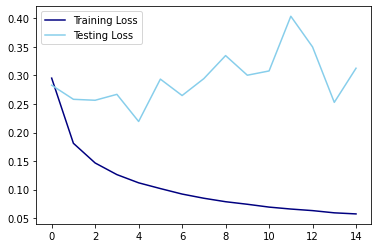

In [ ]:
#Struggled with accuracy, high losses for testing
#Tries multiple methods but ran out of time
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_loss, label='Training Loss', color='navy')
plt.plot(test_loss, label='Testing Loss', color='skyblue')
plt.legend();

In [ ]:
#Binary accuracy only slightly helped

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input

from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

model = Sequential()
#kernel regularizer did not work, dropout does not work, binaryaccuracy, dropout not work
# hidden w/ 60 nodes, two layers

#loss kept increasing for val_accuracy
model.add(Input(shape = X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#use metrics - precision, recall
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['BinaryAccuracy'])
history = model.fit(
    X_train_ada, y_train_ada,
    validation_data=(X_test, y_test),
    epochs=15,
    verbose=1)

Epoch 1/15
9361/9361 [==============================] - 41s 4ms/step - loss: 0.2411 - binary_accuracy: 0.9082 - val_loss: 0.2693 - val_binary_accuracy: 0.8775
Epoch 2/15
9361/9361 [==============================] - 55s 6ms/step - loss: 0.1738 - binary_accuracy: 0.9366 - val_loss: 0.2612 - val_binary_accuracy: 0.8970
Epoch 3/15
9361/9361 [==============================] - 45s 5ms/step - loss: 0.1394 - binary_accuracy: 0.9495 - val_loss: 0.2485 - val_binary_accuracy: 0.9070
Epoch 4/15
9361/9361 [==============================] - 40s 4ms/step - loss: 0.1190 - binary_accuracy: 0.9571 - val_loss: 0.2380 - val_binary_accuracy: 0.9209
Epoch 5/15
9361/9361 [==============================] - 39s 4ms/step - loss: 0.1041 - binary_accuracy: 0.9629 - val_loss: 0.2581 - val_binary_accuracy: 0.9220
Epoch 6/15
9361/9361 [==============================] - 40s 4ms/step - loss: 0.0929 - binary_accuracy: 0.9672 - val_loss: 0.2977 - val_binary_accuracy: 0.9233
Epoch 7/15
9361/9361 [========================

In [ ]:
from sklearn.metrics import classification_report
y_test = data['cancer_count']  
predict_grad = history.predict(data.drop(columns = ['cancer_count']))
print(classification_report(y_test, predict_grad, target_names=['No', 'Yes']))

